# Title: Heart Failure Clinical Records Dataset

**Source** : The dataset was collected at the **Faisalabad Institute of Cardiology and the Allied Hospital in
Faisalabad, Punjab, Pakistan**, during the period of April to December in 2015. It was later made available on
Kaggle.


**Description**: The dataset comprises medical records of **299 patients** diagnosed with heart failure. These records
include various clinical, body, and lifestyle information of the patients. The dataset encompasses 13 features,
providing insights into the patients' health status and potential risk factors for heart failure.

# Features:

**Age**: The age of the patient (numeric).

**Anaemia**: Indicates the presence of anemia (binary: 0 for no, 1 for yes).

**Creatinine Phosphokinase (CPK)**: Level of creatinine phosphokinase enzyme in the blood (numeric).

**Diabetes**: Indicates whether the patient has diabetes (binary: 0 for no, 1 for yes).

**Ejection Fraction**: Percentage of blood leaving the heart at each contraction (numeric).

**High Blood Pressure**: Indicates whether the patient has high blood pressure (binary: 0 for no, 1 for yes).

**Platelets**: Platelet count in the blood (numeric).

**Serum Creatinine**: Level of creatinine in the blood (numeric).

**Serum Sodium**: Level of sodium in the blood (numeric).

**Sex**: Gender of the patient (binary: 0 for female, 1 for male).

**Smoking**: Indicates whether the patient smokes (binary: 0 for no, 1 for yes).

**Time**: Follow-up period (in days) for the patient's condition (numeric).

In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

pd.set_option('display.max_columns',30)

In [4]:
# Loading the data
data = pd.read_csv('C:/Users/sudar/OneDrive/Documents/Courses/Pwskill/Assignment/Eda/Assignment_1/heart_failure_clinical_records_dataset.csv')

In [5]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
data.shape

(299, 13)

In [7]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
data['age'] = data['age'].astype('str').str.replace('.667','')

In [10]:
num_col = [column for column in data.columns if data[column].dtype in ['int64', 'int32', 'int16']]

In [11]:
num_col

['anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

In [12]:
data.duplicated().sum()

0

In [13]:
data.describe()

,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<Axes: xlabel='age', ylabel='Count'>

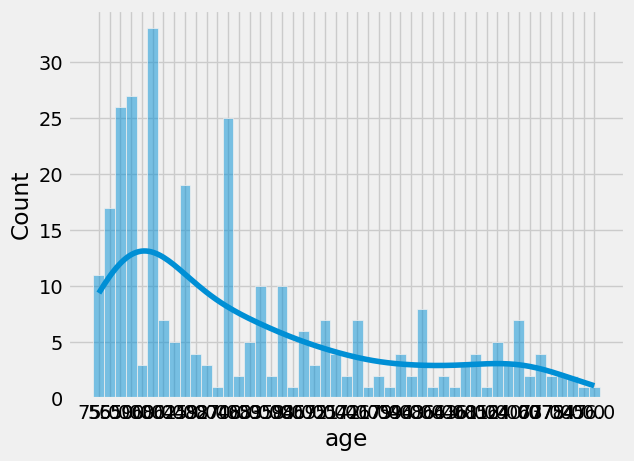

In [14]:
sns.histplot(data['age'],kde = True)

0    170
1    129
Name: anaemia, dtype: int64

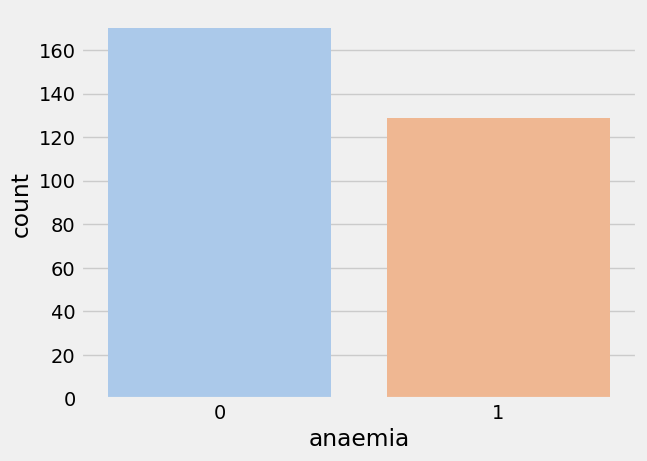

In [15]:
sns.countplot(x = data['anaemia'], palette = 'pastel')
data['anaemia'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

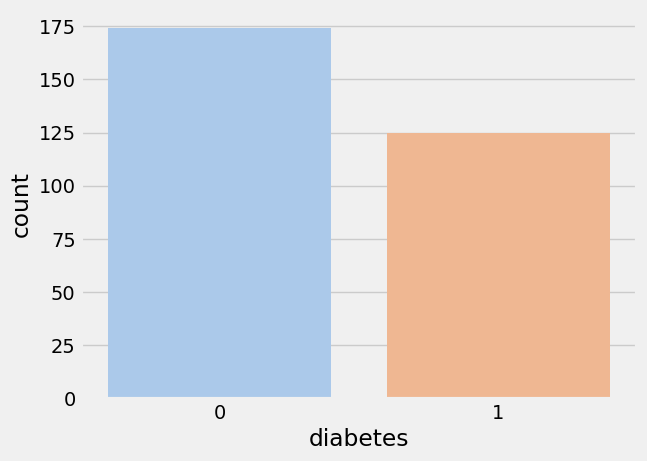

In [16]:
sns.countplot(x = data['diabetes'], palette = 'pastel')
data['diabetes'].value_counts()

# 1] What is the distribution of age among heart failure patients in the dataset

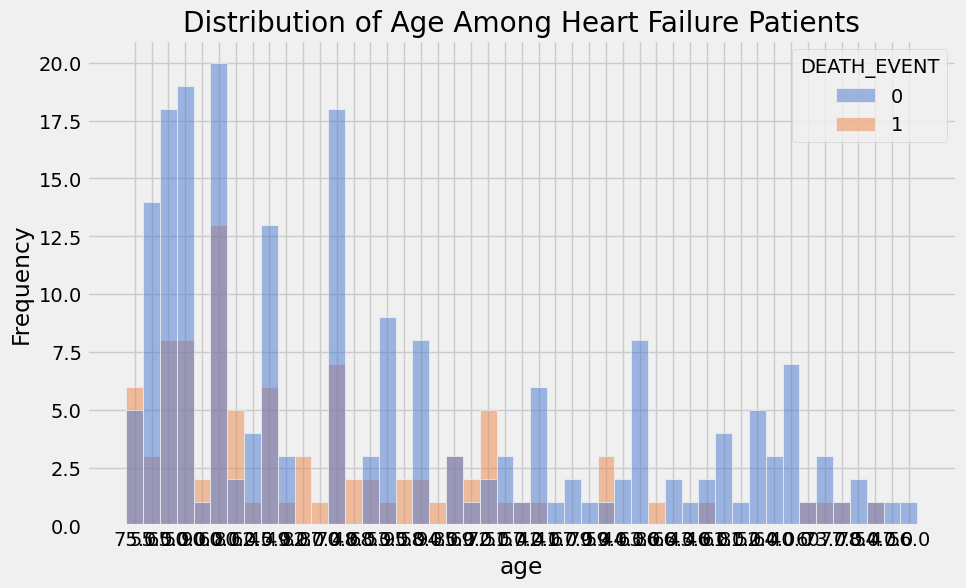

In [17]:
plt.figure(figsize = (10, 6))
sns.histplot(data = data, x = 'age',hue = 'DEATH_EVENT', palette='muted')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Distribution of Age Among Heart Failure Patients')
plt.show()

# 3]  What is the percentage of male and female patients in the dataset?

<Axes: ylabel='sex'>

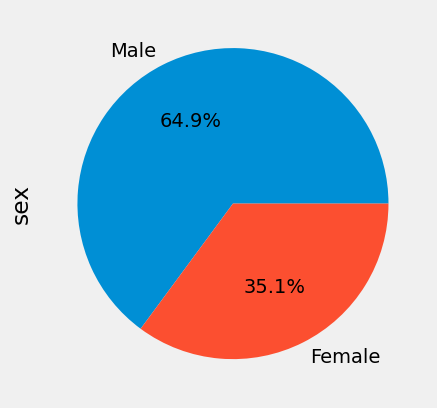

In [26]:
# binary: 0 for female, 1 for male)
data['sex'] = data['sex'].map({1: 'Male', 0: 'Female'})
data['sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')

# 5] How does the platelates count vary among different age group ?

In [37]:
data['age'] = pd.to_numeric(data['age'])

In [38]:
def categorize_age(age):
    if age < 30:
        return 'Young'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

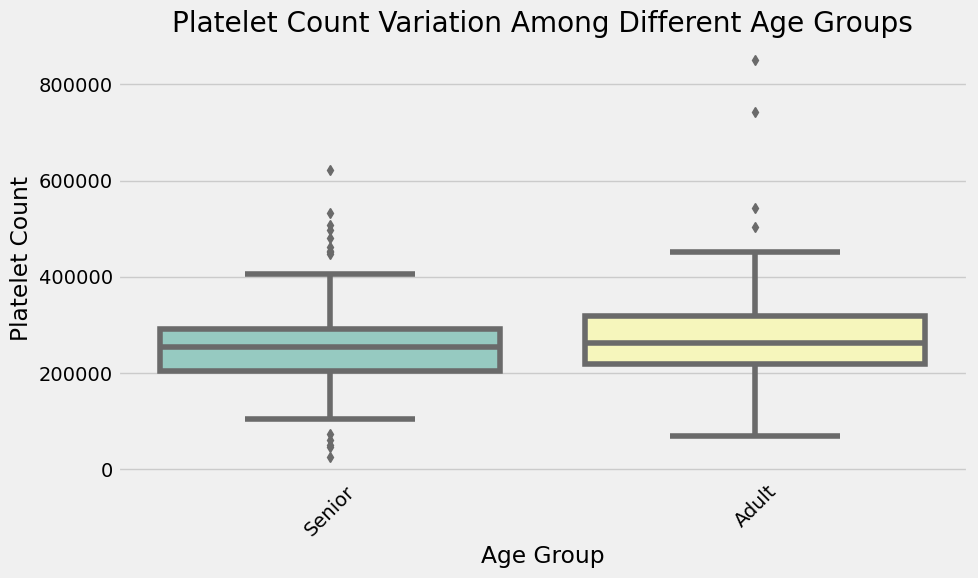

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['age'].map(categorize_age), y='platelets', data=data, palette='Set3')
plt.title('Platelet Count Variation Among Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Platelet Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# 6] How does the prevalence of high blood pressure differ between male and female patients ?

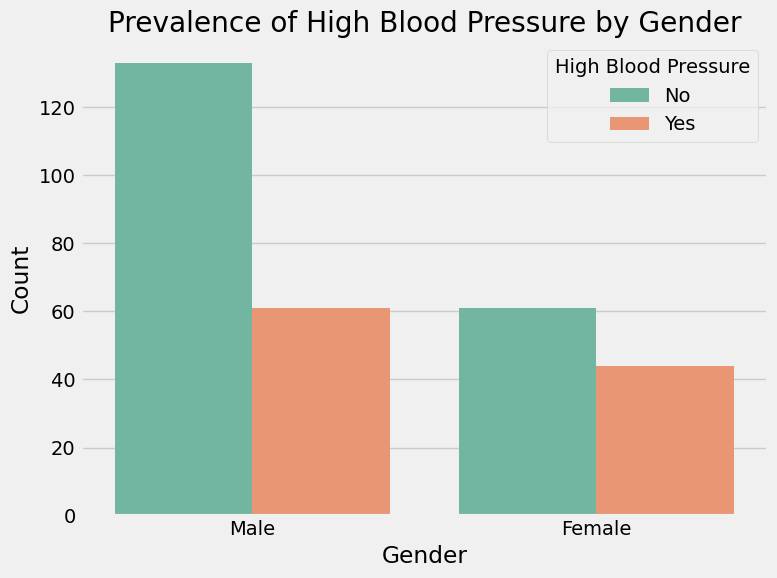

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='high_blood_pressure', data=data, palette='Set2')
plt.title('Prevalence of High Blood Pressure by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='High Blood Pressure', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# 7] What is relationship between smoking habits and the occurence of heart failure ?

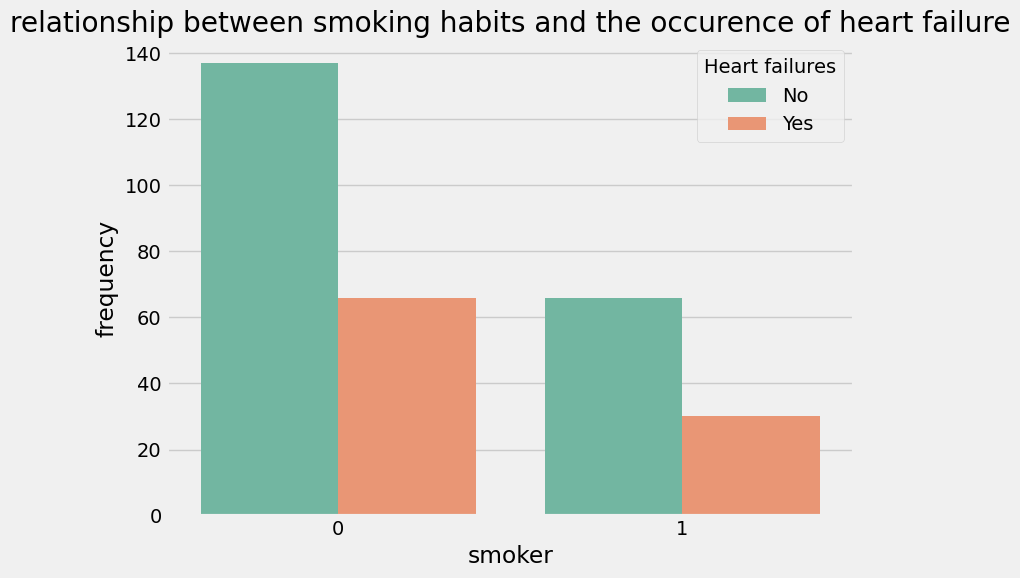

In [55]:
plt.figure(figsize = (8, 6))
sns.countplot(x = 'smoking', hue = 'DEATH_EVENT', data = data, palette = 'Set2')
plt.title('relationship between smoking habits and the occurence of heart failure')
plt.xlabel('smoker')
plt.ylabel('frequency')
plt.legend(title='Heart failures', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()